# Mid-term Exam- Single stock

In [1]:
import pandas as pd
import requests
import yfinance as yf
import datetime 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = yf.download("IBM", start="2019-01-01", end="2021-04-01",group_by="ticker") 
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-12-31  113.330002  114.349998  112.419998  113.669998  101.703552   
2019-01-02  112.010002  115.980003  111.690002  115.209999  103.081429   
2019-01-03  114.529999  114.879997  112.690002  112.910004  101.023560   
2019-01-04  114.910004  117.489998  114.440002  117.320000  104.969307   
2019-01-07  117.500000  118.830002  116.669998  118.150002  105.711922   
...                ...         ...         ...         ...         ...   
2021-03-25  130.330002  133.240005  129.770004  133.070007  133.070007   
2021-03-26  133.289993  136.479996  133.119995  136.380005  136.380005   
2021-03-29  135.979996  137.070007  135.509995  135.860001  135.860001   
2021-03-30  135.860001  136.270004  134.020004  134.720001  134.720001   
2021-03-31  134.539993  134.710007  132.710

### 以上用了International Business Machines Corporation (IBM) 國際商業機器公司的股票作為期中作業的DATA

In [3]:
IBM=df

In [4]:
IBM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,130.031111,131.252699,128.816808,130.060547,122.785241,4.880043e+06
std,10.407202,10.108071,10.630909,10.372041,8.308096,3.052647e+06
min,94.599998,97.739998,90.559998,94.769997,89.788025,1.202100e+06
25%,122.470001,123.475002,121.030003,122.330002,118.911770,3.151950e+06
50%,130.949997,132.289993,129.160004,130.550003,123.640984,4.118900e+06
75%,137.815002,138.750000,137.150002,137.894997,127.152096,5.496050e+06
max,156.820007,158.750000,155.419998,156.759995,147.145508,3.806350e+07


In [5]:
IBM['Close'].shift(-1)

Date
2018-12-31    115.209999
2019-01-02    112.910004
2019-01-03    117.320000
2019-01-04    118.150002
2019-01-07    119.830002
                 ...    
2021-03-25    136.380005
2021-03-26    135.860001
2021-03-29    134.720001
2021-03-30    133.259995
2021-03-31           NaN
Name: Close, Length: 567, dtype: float64

In [6]:
IBM['Close1']=IBM['Close'].shift(-1)

In [7]:
IBM

,Open,High,Low,Close,Adj Close,Volume,Close1
Date,,,,,,,
2018-12-31,113.330002,114.349998,112.419998,113.669998,101.703552,4982800,115.209999
2019-01-02,112.010002,115.980003,111.690002,115.209999,103.081429,4239900,112.910004
2019-01-03,114.529999,114.879997,112.690002,112.910004,101.023560,4346700,117.320000
2019-01-04,114.910004,117.489998,114.440002,117.320000,104.969307,4477800,118.150002
2019-01-07,117.500000,118.830002,116.669998,118.150002,105.711922,3751200,119.830002
...,...,...,...,...,...,...,...
2021-03-25,130.330002,133.240005,129.770004,133.070007,133.070007,5554000,136.380005
2021-03-26,133.289993,136.479996,133.119995,136.380005,136.380005,5562500,135.860001
2021-03-29,135.979996,137.070007,135.509995,135.860001,135.860001,4622700,134.720001


In [8]:
IBM['priceDiff']=IBM['Close1']-IBM['Close']

In [9]:
IBM['return']=IBM['priceDiff']/IBM['Close']

In [10]:
#List Comprehesion
#Selecting data by row numbers (.iloc)
#Selecting data by label or by a conditional statment (.loc)
IBM['direction']=[1 if IBM.loc[ei,'priceDiff']>0 else -1 for ei in IBM.index]

In [11]:
#MovingAverage
IBM['Avg3']=(IBM['Close']+IBM['Close'].shift(1)+IBM['Close'].shift(2))/3

In [12]:
#calculate moving average using rolling 
IBM['MA10']=IBM['Close'].rolling(10).mean()

In [13]:
IBM['MA20']=IBM['Close'].rolling(20).mean()

In [14]:
IBM['MA60']=IBM['Close'].rolling(60).mean()

In [15]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

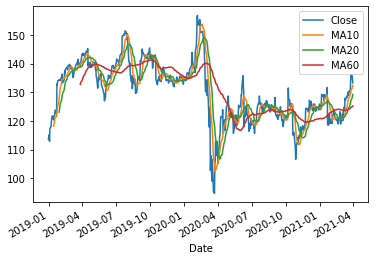

In [16]:
IBM['Close'].plot(legend=True)
IBM['MA10'].plot(legend=True)
IBM['MA20'].plot(legend=True)
IBM['MA60'].plot(legend=True)
##
#If MA10 is above MA20, some traders who we call trend-following traders,
#they believe the stock price will move upwards for a while.

### 由上圖可知，近幾個月份的短線平均大於長線平均，所以認為股價會上漲一段時間，因此現在可以做買入的動作

In [17]:
IBM['Shares'] = [1 if IBM.loc[ei,'MA10']>IBM.loc[ei,'MA60'] else 0
                  for ei in IBM.index]
IBM['Shares']

Date
2018-12-31    0
2019-01-02    0
2019-01-03    0
2019-01-04    0
2019-01-07    0
             ..
2021-03-25    1
2021-03-26    1
2021-03-29    1
2021-03-30    1
2021-03-31    1
Name: Shares, Length: 567, dtype: int64

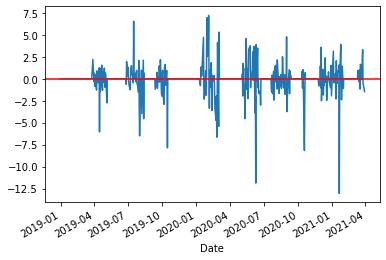

In [18]:
import matplotlib.pyplot as plt

IBM['Profit'] = [IBM.loc[ei,'Close1'] - IBM.loc[ei,'Close']
                    if IBM.loc[ei,'Shares']==1
                    else 0 for ei in IBM.index]
IBM['Profit'].plot()
plt.axhline(y=0,color='red')

In [19]:
IBM['wealth'] = IBM['Profit'].cumsum()
IBM.tail()

,Open,High,Low,Close,Adj Close,Volume,Close1,priceDiff,return,direction,Avg3,MA10,MA20,MA60,Shares,Profit,wealth
Date,,,,,,,,,,,,,,,,,
2021-03-25,130.330002,133.240005,129.770004,133.070007,133.070007,5554000,136.380005,3.309998,0.024874,1,131.383336,129.712001,126.321001,124.501167,1,3.309998,-38.470009
2021-03-26,133.289993,136.479996,133.119995,136.380005,136.380005,5562500,135.860001,-0.520004,-0.003813,-1,133.356669,130.589001,127.193501,124.710834,1,-0.520004,-38.990013
2021-03-29,135.979996,137.070007,135.509995,135.860001,135.860001,4622700,134.720001,-1.139999,-0.008391,-1,135.103338,131.317001,127.949501,124.902834,1,-1.139999,-40.130013
2021-03-30,135.860001,136.270004,134.020004,134.720001,134.720001,4790400,133.259995,-1.460007,-0.010837,-1,135.653336,131.965001,128.669001,125.050167,1,-1.460007,-41.590019
2021-03-31,134.539993,134.710007,132.710007,133.259995,133.259995,4945100,NaN,NaN,NaN,-1,134.613332,132.388000,129.214001,125.205501,1,NaN,NaN


In [20]:
print("Total money you win is ", IBM.loc[IBM.index[-2],'wealth'])
print("Total money you spent is ", IBM.loc[IBM.index[0],'Close'])

Total money you win is  -41.59001922607422
Total money you spent is  113.66999816894531


<AxesSubplot:>

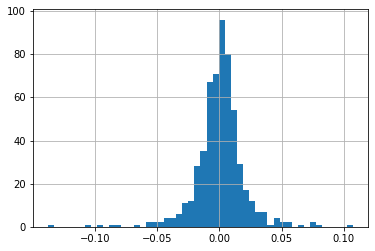

In [21]:
import numpy as np
IBM['LogReturn'] = np.log(IBM['Close']).shift(-1) - np.log(IBM['Close'])
IBM['LogReturn'].hist(bins=50)

In [22]:
mu = IBM['LogReturn'].mean()
sigma = IBM['LogReturn'].std(ddof=1)
print(mu, sigma)

0.00028092326558813106 0.02029832329214964


In [23]:
from scipy.stats import norm

mu1 = 1*mu
sigma1 = 1**0.5*sigma

print(mu1, sigma1)

print('The probability of rising over 5% in 1 days is ',
     norm.cdf(0.05, mu1,sigma1))


print(mu1, sigma1)

print('The probability of dropping over -5% in 1 days is ',
     norm.cdf(-0.05, mu1,sigma1))


print(mu1, sigma1)

print('The probability of rising over 10% in 1 days is ',
     norm.cdf(0.1, mu1,sigma1))

mu365 = 365*mu
sigma365 = 365**0.5*sigma
print(mu365, sigma365)

print('The probability of rising over 5% in 365 days is ',
     norm.cdf(0.05, mu365,sigma365))


print(mu365, sigma365)

print('The probability of dropping over -5% in 365 days is ',
     norm.cdf(-0.05, mu365,sigma365))


print(mu365, sigma365)

print('The probability of rising over 10% in 365 days is ',
     norm.cdf(0.1, mu365,sigma365))

0.00028092326558813106 0.02029832329214964
The probability of rising over 5% in 1 days is  0.9928456340191516
0.00028092326558813106 0.02029832329214964
The probability of dropping over -5% in 1 days is  0.006622788029990371
0.00028092326558813106 0.02029832329214964
The probability of rising over 10% in 1 days is  0.999999550790622
0.10253699193966784 0.38779892198471616
The probability of rising over 5% in 365 days is  0.4461182328750131
0.10253699193966784 0.38779892198471616
The probability of dropping over -5% in 365 days is  0.34703403310680864
0.10253699193966784 0.38779892198471616
The probability of rising over 10% in 365 days is  0.49739012649852643


### 由上面列印出的結果顯示，在一天內上漲5% or 10%的機率幾乎為99%，在一天內跌5%的機率幾乎為0%，而一年內上漲5% or 10%的機率約為44% 及 49%，一年內下跌5%機率約為34%

In [24]:
# The probability of rising over 10% in 1 days
mu1 = 1*mu
sigma1 = 1**0.5*sigma
# print(mu1, sigma1)

VaR_90 = norm.ppf(0.1, mu1, sigma1)
VaR_90

-0.025732424727396667

### 根據以上計算，單日風險價值10％的VaR約為-2.5%

In [25]:
z_left = norm.ppf(0.025)
z_right = norm.ppf(0.975)
sample_mean = IBM['LogReturn'].mean()
sample_std = IBM['LogReturn'].std(ddof=1)/(IBM.shape[0])**0.5

In [26]:
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std
print("Sample Mean is ", sample_mean)
print("*****************************************")
print("95% confidence interval is ")
print(interval_left, interval_right)

Sample Mean is  0.00028092326558813106
*****************************************
95% confidence interval is 
-0.0013898469585564483 0.0019516934897327101


In [27]:
n = IBM['LogReturn'].shape[0]
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

7.847125562832722


In [28]:
alpha = 0.05
zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft
print(zleft, zright)
print('At the significance level of ', alpha)
print('Shall we reject?:', zhat>zright or zhat<zleft)

-1.9599639845400545 1.9599639845400545
At the significance level of  0.05
Shall we reject?: True


### 由上所示，因為Shall we reject?= True，所以代表接受拒絕了虛無假設的接受收益率為0的假設，也就是收益率不會為0，所以由此可知股票的平均日收益率不為0

# Mid-term Exam- Multi-linear model

In [29]:
IBM  = yf.download("IBM"  ,group_by="ticker") # 國際商業機器公司
HPQ  = yf.download("HPQ"  ,group_by="ticker") # 惠普公司
ORCL = yf.download("ORCL" ,group_by="ticker") # 甲骨文公司
CSCO = yf.download("CSCO" ,group_by="ticker") # 思科系統公司
DELL = yf.download("DELL" ,group_by="ticker") # 戴爾技術公司
DELL = yf.download("DELL" ,group_by="ticker") # 戴爾技術公司
spy  = yf.download("SPY"  ,group_by="ticker") # SPDR S＆P 500 ETF信託

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [30]:
DELL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-17,24.086378,24.363234,23.809525,23.809525,23.809525,137617
2016-08-18,24.363234,24.363234,23.532669,23.671097,23.671097,895776
2016-08-19,23.643412,24.086378,23.615725,24.086378,24.086378,2400355
2016-08-22,23.809525,25.249168,23.588039,24.169436,24.169436,1138322
2016-08-23,24.224806,25.415281,24.086378,24.916945,24.916945,751657


In [31]:
# Due to the timezone issues, we extract and calculate appropriate stock market data for analysis
# Indicepanel is the DataFrame of our trading model
indicepanel=pd.DataFrame(index=spy.index)

indicepanel['spy']=spy['Open'].shift(-1)-spy['Open']
indicepanel['spy_lag1']=indicepanel['spy'].shift(1)

indicepanel['IBM']=IBM["Open"]-IBM['Open'].shift(1)
indicepanel['HPQ']=HPQ['Open']-HPQ['Open'].shift(1)
indicepanel['ORCL']=ORCL['Open']-ORCL['Open'].shift(1)
indicepanel['CSCO']=CSCO['Open']-CSCO['Open'].shift(1)
indicepanel['DELL']=DELL['Open']-DELL['Open'].shift(1)

indicepanel['Price']=spy['Open']

In [32]:
indicepanel.head()

,spy,spy_lag1,IBM,HPQ,ORCL,CSCO,DELL,Price
Date,,,,,,,,
1993-01-29,0.0000,NaN,0.2500,-0.014192,-0.012346,-0.006945,NaN,43.96875
1993-02-01,0.2500,0.0000,0.2500,0.035479,-0.003086,0.013889,NaN,43.96875
1993-02-02,0.1875,0.2500,0.0625,0.056767,0.024691,0.024306,NaN,44.21875
1993-02-03,0.5625,0.1875,0.0625,-0.035479,-0.009259,0.031250,NaN,44.40625
1993-02-04,0.0000,0.5625,-0.3750,-0.070958,0.003086,-0.010417,NaN,44.96875


In [33]:
# Lets check whether do we have NaN values in indicepanel
indicepanel.isnull().sum()

spy            1
spy_lag1       1
IBM            0
HPQ            0
ORCL           0
CSCO           0
DELL        5932
Price          0
dtype: int64

In [34]:
# We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [35]:
# Lets check whether do we have Nan values in indicepanel now
indicepanel.isnull().sum()

spy         0
spy_lag1    0
IBM         0
HPQ         0
ORCL        0
CSCO        0
DELL        0
Price       0
dtype: int64

In [36]:
# save this indicepanel for part 4.5
path_save = 'indicepanel.csv'
indicepanel.to_csv(path_save)

In [37]:
print(indicepanel.shape)

(1176, 8)


In [38]:
#split the data into (1)train set and (2)test set

Train = indicepanel.iloc[-2000:-1000, :]
Test = indicepanel.iloc[-1000:, :]
print(Train.shape, Test.shape)

(176, 8) (1000, 8)


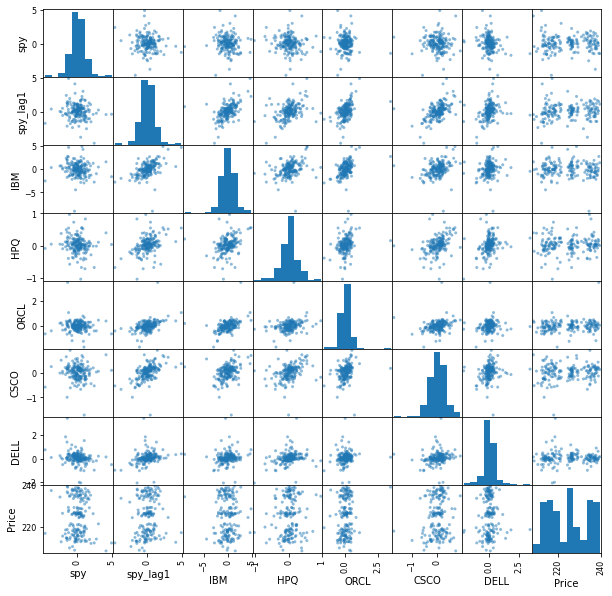

In [39]:
# Generate scatter matrix among all stock markets (and the price of SPY) to observe the association

from pandas.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(10, 10))

In [40]:
# Find the indice with largest correlation
corr_array = Train.iloc[:, :-1].corr()['spy']
print(corr_array)

spy         1.000000
spy_lag1   -0.104923
IBM        -0.080708
HPQ        -0.112107
ORCL       -0.059620
CSCO       -0.037900
DELL       -0.244315
Name: spy, dtype: float64


In [41]:
import statsmodels.formula.api as smf
formula = 'spy~spy_lag1+IBM+HPQ+ORCL+CSCO+DELL'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.934
Date:                Wed, 21 Apr 2021   Prob (F-statistic):             0.0780
Time:                        21:50:37   Log-Likelihood:                -269.27
No. Observations:                 176   AIC:                             552.5
Df Residuals:                     169   BIC:                             574.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1594      0.087      1.826      0.070      -0.013       0.332
spy_lag1      -0.0261      0.105     -0.250      0.803      -0.233       0.181
IBM           -0.0227      0.069     -0.331      0.741      -0.158       0.113
HPQ           -0.1763      0.382     -0.461      0.645      -0.931       0.578
ORCL          -0.0309      0.231     -0.134      0.894      -0.487       0.426
CSCO           0.1542      0.335      0.461      0.645      -0.506       0.815
DELL          -0.5000      0.174     -2.872      0.005      -0.844      -0.156
==============================================================================
Omnibus:                       18.853   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.905
Skew:                           0.076   Prob(JB):                     3.29e-17
Kurtosis:                       6.214   Cond. No.                         8.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 由上所示，Prob (F-statistic)=0.0799 > 0.05 ，因此接受虛無假設，所以代表接受了至少兩種方法之間不存在差異的假設

In [42]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

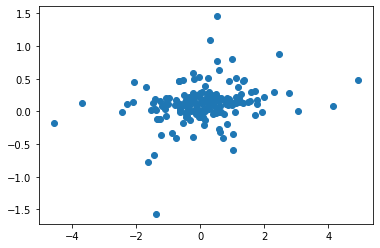

In [43]:
plt.scatter(Train['spy'], Train['PredictedY'])

In [44]:
#Multicolinarity
Train.iloc[:,:-1].corr()

,spy,spy_lag1,IBM,HPQ,ORCL,CSCO,DELL,Price
spy,1.000000,-0.104923,-0.080708,-0.112107,-0.059620,-0.037900,-0.244315,-0.024086
spy_lag1,-0.104923,1.000000,0.513558,0.411893,0.453662,0.542216,0.282808,0.105521
IBM,-0.080708,0.513558,1.000000,0.316381,0.448726,0.310783,0.142328,-0.035951
HPQ,-0.112107,0.411893,0.316381,1.000000,0.276955,0.364541,0.282478,0.075688
ORCL,-0.059620,0.453662,0.448726,0.276955,1.000000,0.272516,0.101007,0.130485
CSCO,-0.037900,0.542216,0.310783,0.364541,0.272516,1.000000,0.168654,0.113243
DELL,-0.244315,0.282808,0.142328,0.282478,0.101007,0.168654,1.000000,0.021808
Price,-0.024086,0.105521,-0.035951,0.075688,0.130485,0.113243,0.021808,1.000000


### Model evaluation - Statistical standard

In [45]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [46]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [47]:
# Get the assement table fo our model
assessTable(Test, Train, lm, 9, 'spy')

,Train,Test
R2,0.013525,0.030239
RMSE,1.150588,3.471554


### 上面結果顯示，RMSE的差異稍稍明顯，不過總體來說差異沒有非常多，因此認為是沒有Overfitting的

In [48]:
indicepanel.head()

,spy,spy_lag1,IBM,HPQ,ORCL,CSCO,DELL,Price
Date,,,,,,,,
2016-08-18,-0.029999,0.339996,-0.080002,0.120001,-0.430000,-0.559999,0.276855,218.339996
2016-08-19,-0.050003,-0.029999,-0.050003,-0.060000,0.090000,-0.039999,-0.719822,218.309998
2016-08-22,0.990005,-0.050003,-0.839996,-0.100000,0.070000,0.070000,0.166113,218.259995
2016-08-23,-0.449997,0.990005,0.330002,0.070001,0.259998,0.389999,0.415281,219.250000
2016-08-24,-1.400009,-0.449997,-0.440002,0.240000,-0.020000,0.150000,3.460688,218.800003


In [49]:
Train = indicepanel.iloc[-2000:-1000, :]
Test = indicepanel.iloc[-1000:, :]

In [50]:
formula = 'spy~spy_lag1+IBM+HPQ+ORCL+CSCO+DELL'
lm = smf.ols(formula=formula, data=Train).fit()

In [51]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

### Profit of Signal-based strategy

In [52]:
# Train
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  40.100128173828125


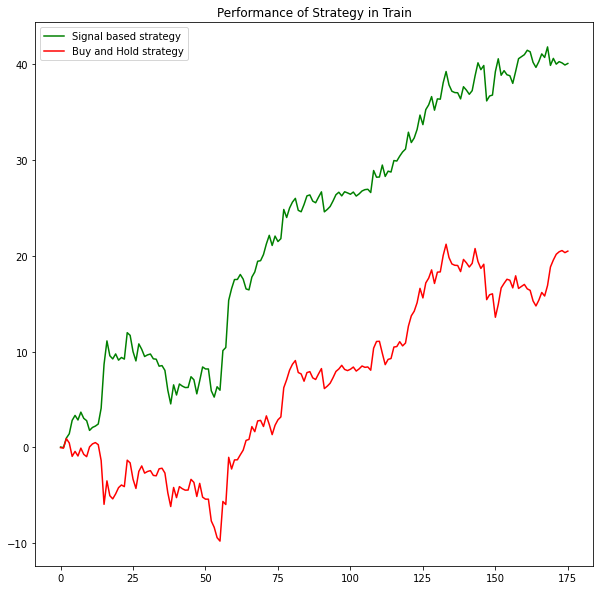

In [53]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [54]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  126.02932739257812


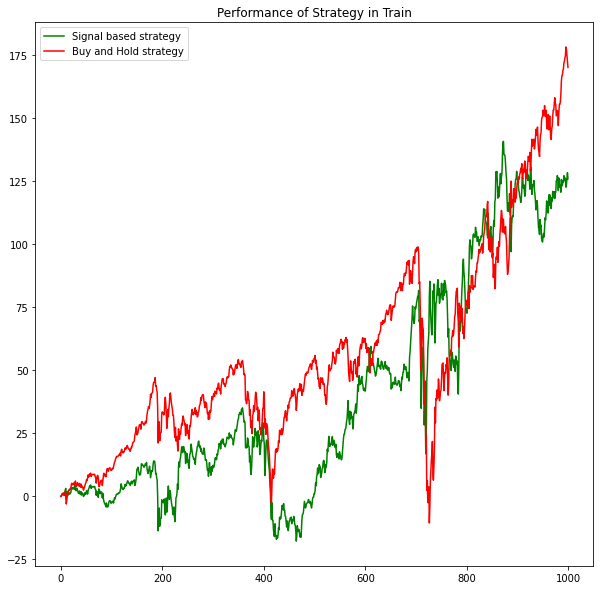

In [55]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

### Evaluation of model - Practical Standard

In [56]:
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

In [57]:
# Sharpe Ratio on Train data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.19927451145352215
Yearly Sharpe Ratio is  3.1633847996394726


In [58]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.035713535409391414
Yearly Sharpe Ratio is  0.5669347987928942


In [59]:
# Maximum Drawdown in Train data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())

Maximum Drawdown in Train is  0.03230289679844974


In [60]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Test is  0.20227154378388074
